In [102]:
import pandas as pd
import numpy as np



import matplotlib.pyplot as plt

# Plotting



def plot_(time,X,Y,Z,sz = (10,6)):
  plt.figure(figsize=sz)

  # Plot each column against the 'timeStamps'
  plt.plot(time, X, label='X')
  plt.plot(time, Y, label='Y')
  plt.plot(time, Z, label='Z')

  # Add labels and title with bold text
  plt.xlabel('Timestamp', fontsize=14, fontweight='bold')
  plt.ylabel('Position', fontsize=14, fontweight='bold')
  #plt.title('Movement Over Time', fontsize=16, fontweight='bold')
  plt.legend(fontsize=12, loc='upper right')  # Show legend with bold text

  # Set tick parameters
  plt.xticks(fontsize=12, fontweight='bold')
  plt.yticks(fontsize=12, fontweight='bold')

  # Show plot
  plt.show()



def single_plot(time, valu,sz = (10,6)):
  plt.figure(figsize=sz)

  plt.plot(time, valu, label='X')


  plt.xlabel('Timestamp', fontsize=14, fontweight='bold')
  plt.ylabel('Position', fontsize=14, fontweight='bold')

  # Set tick parameters
  plt.xticks(fontsize=12, fontweight='bold')
  plt.yticks(fontsize=12, fontweight='bold')

  # Show plot
  plt.show()



In [103]:



df = pd.read_csv("/content/drive/MyDrive/Iqram Sir/kinzData_panda_2024-03-26_12-44PM.csv")




all_points = []
for i in list(df.columns):
  temp = i.split("_")
  if "X" in temp:

    if len(temp[0:-1]) == 2:
      all_points.append(temp[0]+"_"+temp[1])
    else:
      all_points.append(temp[0])

In [104]:
import ipywidgets as widgets
from IPython.display import display

# Define radio buttons
radio_buttons = widgets.RadioButtons(
    options=all_points,
    description='Choose an option:',
    disabled=False
)
display(radio_buttons)

RadioButtons(description='Choose an option:', options=('PELVIS', 'SPINE_NAVAL', 'SPINE_CHEST', 'NECK', 'CLAVIC…

# Chose Subject, Trial Number, Walking Speed

In [105]:
p_id = "001-LO"
t_num = 3
walk_speed = "Fast"          #Regular,Fast


temp_df = df.query("patientID == '"+p_id+"' and trial_num == "+str(t_num)+" and walking_speed == '"+walk_speed+"'")

column = radio_buttons.value

t = temp_df["timeStamps"]
x = temp_df[column+"_X"]
y = temp_df[column+"_Y"]
z = temp_df[column+"_Z"]

# Detrend

In [106]:
import numpy as np
from scipy import signal



det_x = signal.detrend(x)
det_y = signal.detrend(y)
det_z = signal.detrend(z)

# Raw Plot

## Raw X

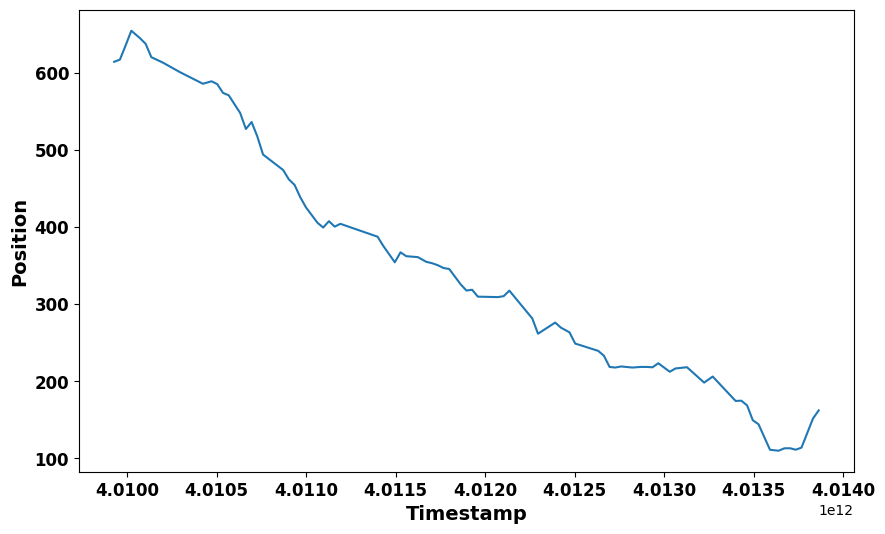

In [107]:

single_plot(t,x)

## Raw Y

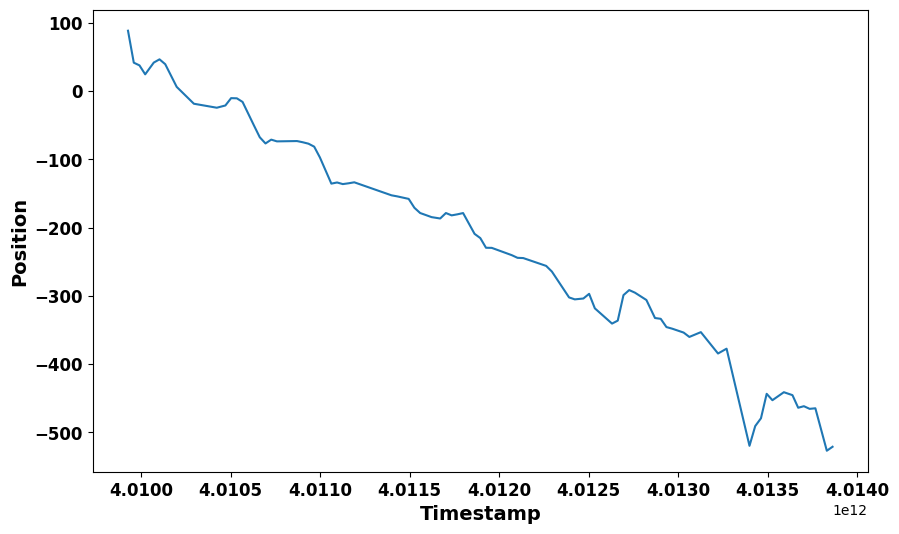

In [108]:
single_plot(t,y)

## Raw Z

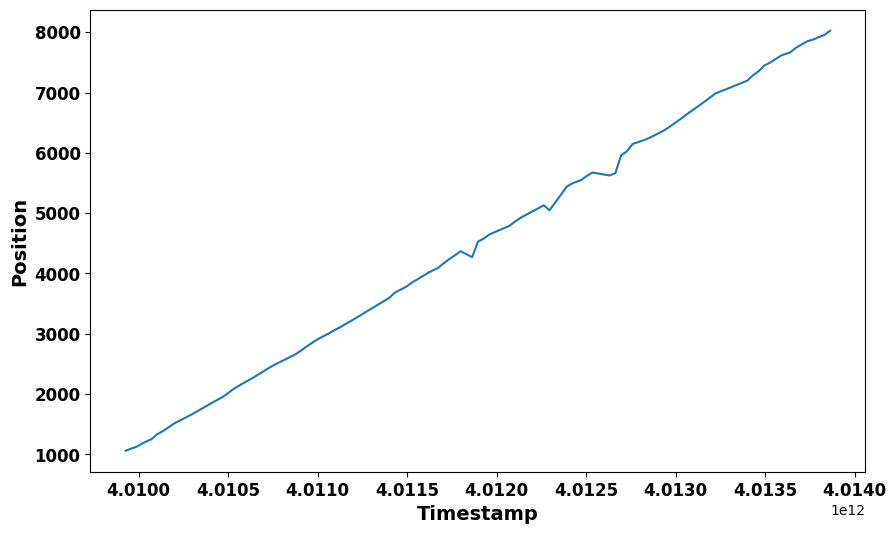

In [109]:
single_plot(t,z)

# Detrend Plot

## Detrend X

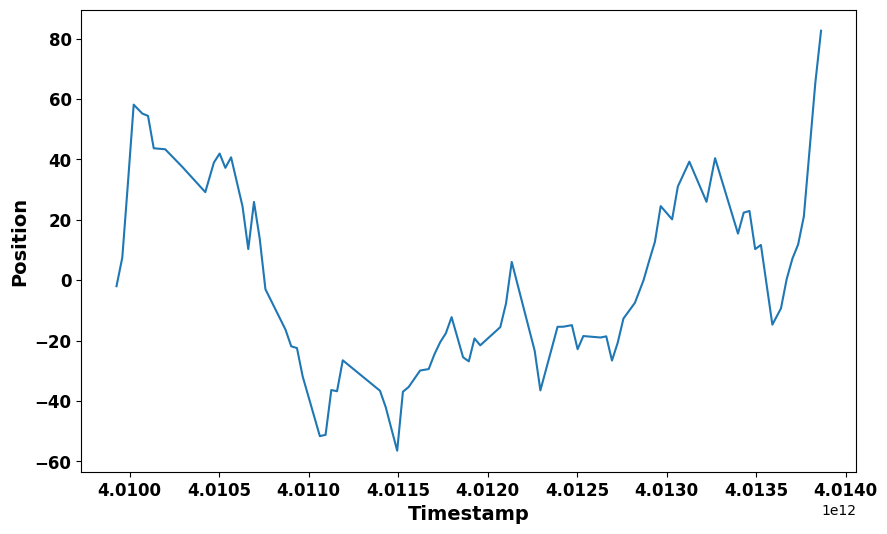

In [110]:
single_plot(t,det_x)

## Detrend Y

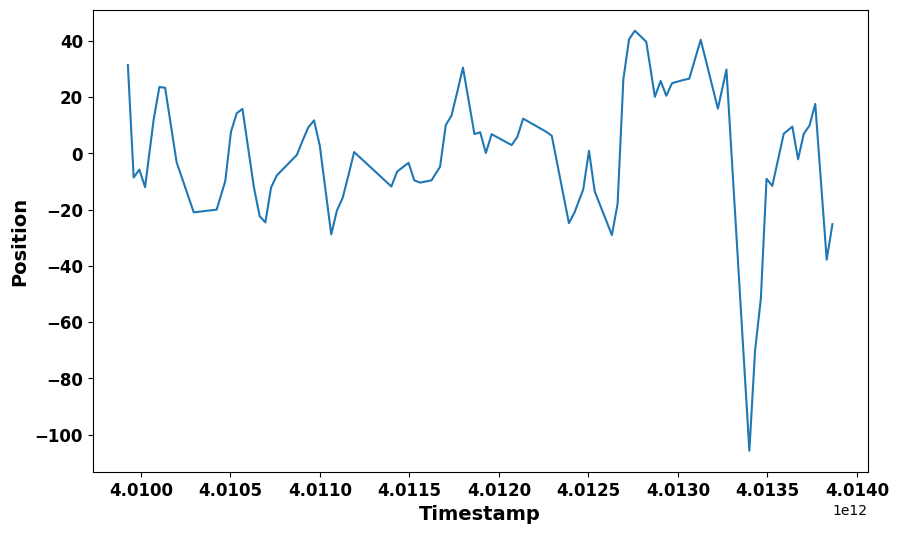

In [111]:
single_plot(t,det_y)

## Detrend Z

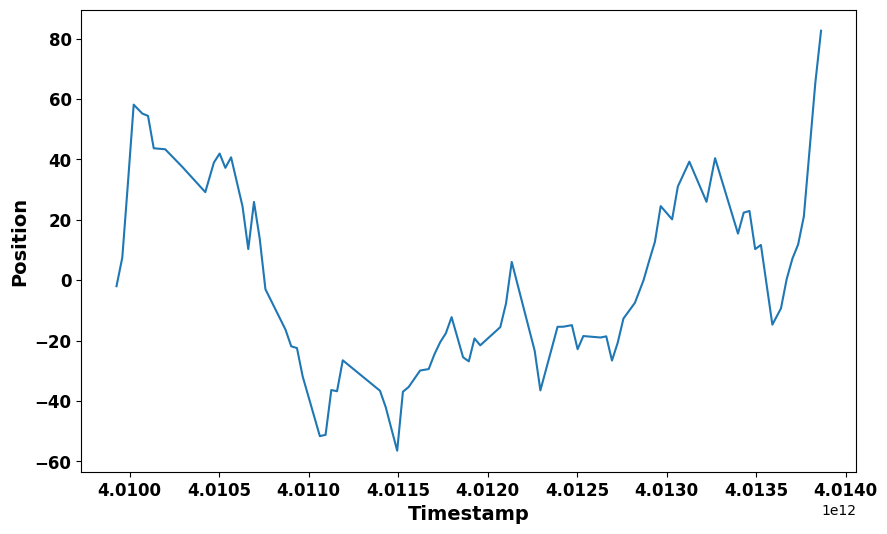

In [112]:
single_plot(t,det_x)

# Low Pass Filter

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


def low_pass_filter(t, x):
  # Designing the low-pass filter
  cutoff_freq = 4 # Hz
  nyquist_freq = 0.5 * 10  # Nyquist frequency for the given sampling rate (1000 Hz)
  normalized_cutoff_freq = cutoff_freq / nyquist_freq
  b, a = signal.butter(4, normalized_cutoff_freq, btype='low')

  # Applying the filter to the noisy waveform
  filtered_x = signal.lfilter(b, a, x)

  # Plotting the original and filtered waveforms
  plt.figure()
  plt.plot(t, x, label='Noisy Waveform')
  plt.plot(t, filtered_x, label='Filtered Waveform')
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  plt.title('Low-Pass Filtered Noisy Waveform')
  plt.legend()
  plt.grid(True)
  plt.show()
  return filtered_x

## Low Pass Filter For X

### Raw

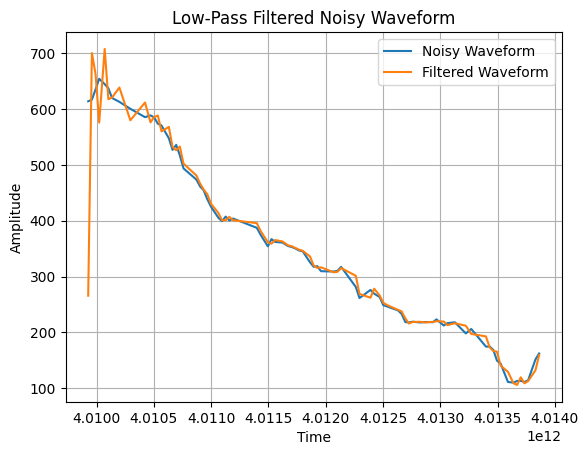

In [114]:
low_pass_filt_raw_x = low_pass_filter(t, x)

### Detrend

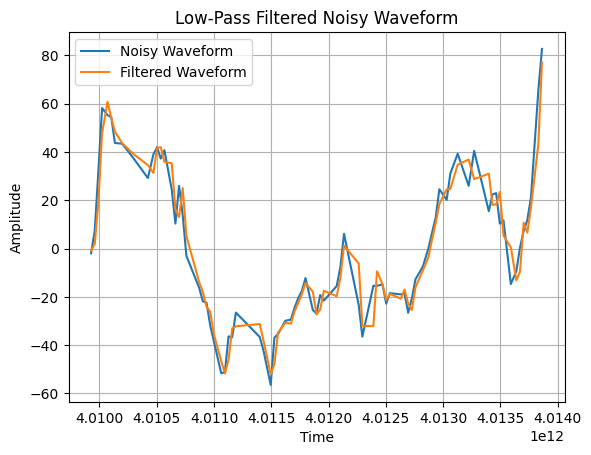

In [115]:
low_pass_filt_det_x = low_pass_filter(t, det_x)

## Low Pass Filter for Y

### Raw

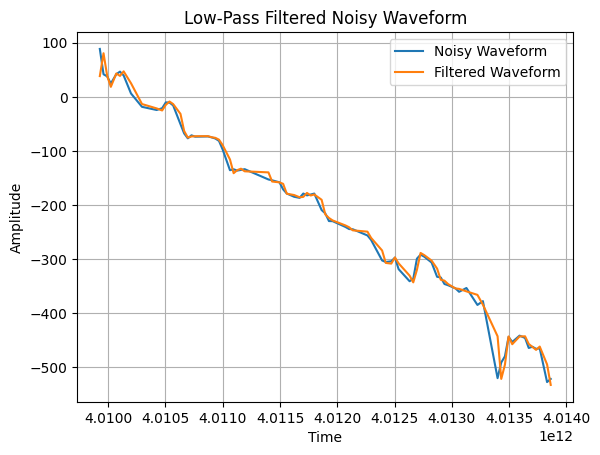

In [116]:
low_pass_filt_raw_y = low_pass_filter(t, y)

### Detrend

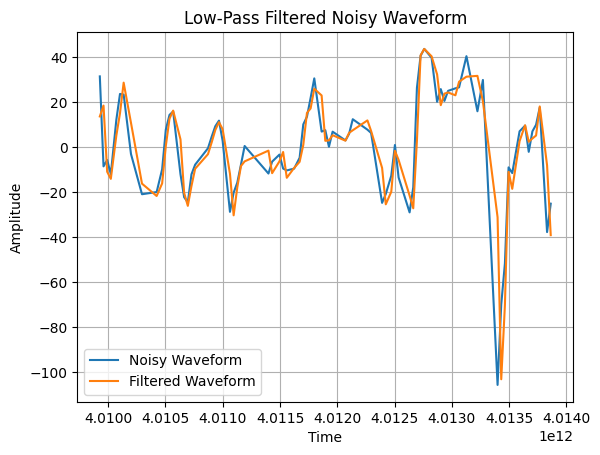

In [117]:
low_pass_filt_det_y = low_pass_filter(t, det_y)

## Low Pass Filter for Z

### Raw

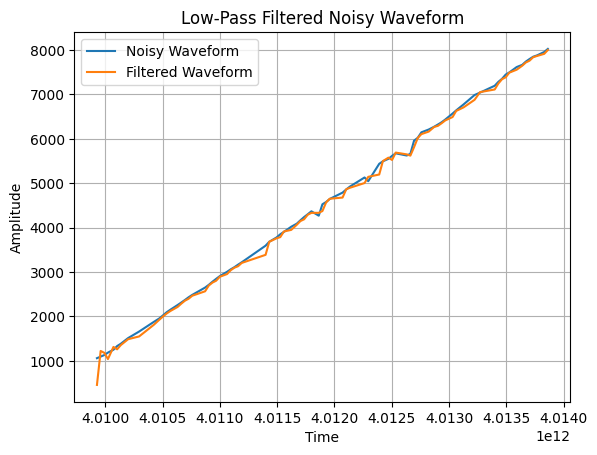

In [118]:
low_pass_filt_raw_z = low_pass_filter(t, z)

### Detrend

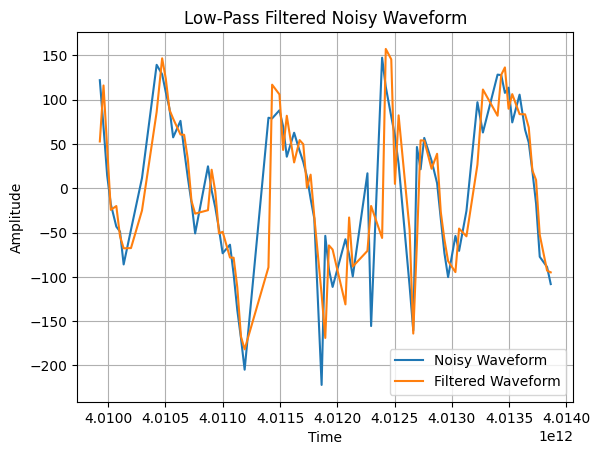

In [119]:
low_pass_filt_det_z = low_pass_filter(t, det_z)

# Moving Avg Filter

In [120]:
import numpy as np
import matplotlib.pyplot as plt


def Moving_Avg_Filter(t,x):

  # Define the window size for the moving average filter
  window_size = 6

  # Implementing the moving average filter
  filtered_x = np.convolve(x, np.ones(window_size)/window_size, mode='valid')

  # Plotting the original and filtered waveforms
  plt.figure()
  plt.plot(t, x, label='Noisy Waveform')
  plt.plot(t[window_size-1:], filtered_x, label='Filtered Waveform')
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  plt.title('Moving Average Filtered Noisy Waveform')
  plt.legend()
  plt.grid(True)
  plt.show()
  return filtered_x

## MAF for X

### Raw

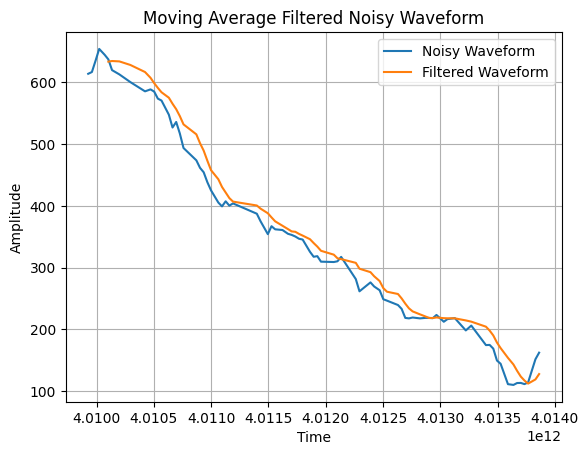

In [121]:
moving_avg_filter_raw_x = Moving_Avg_Filter(t,x)

### Detrend

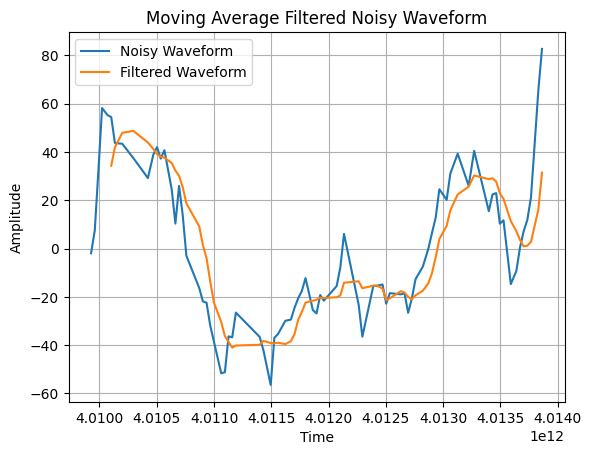

In [122]:
moving_avg_filter_det_x = Moving_Avg_Filter(t,det_x)

## MAF For Y

### Raw

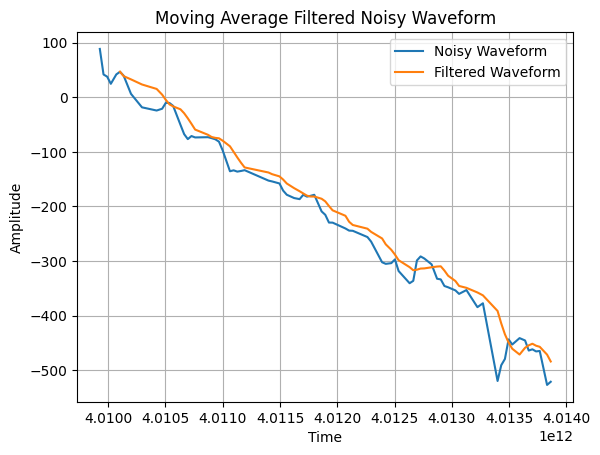

In [123]:
moving_avg_filter_raw_y = Moving_Avg_Filter(t,y)

### Detrend

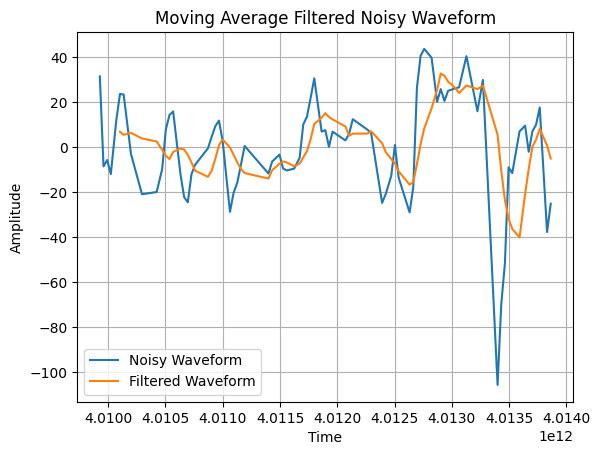

In [124]:
moving_avg_filter_det_y = Moving_Avg_Filter(t,det_y)

## MAF For Z

### Raw

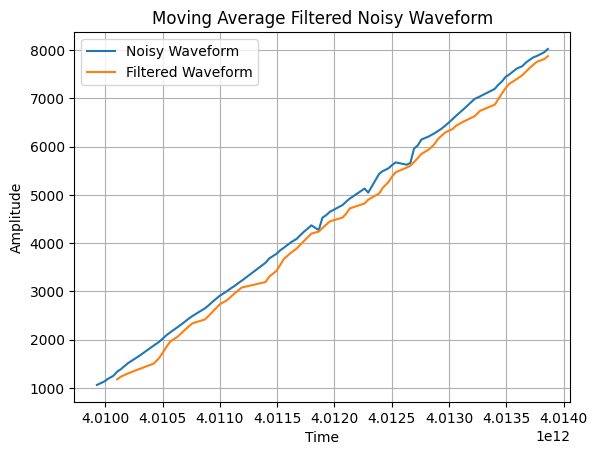

In [125]:
moving_avg_filter_raw_z = Moving_Avg_Filter(t,z)

### Detrend

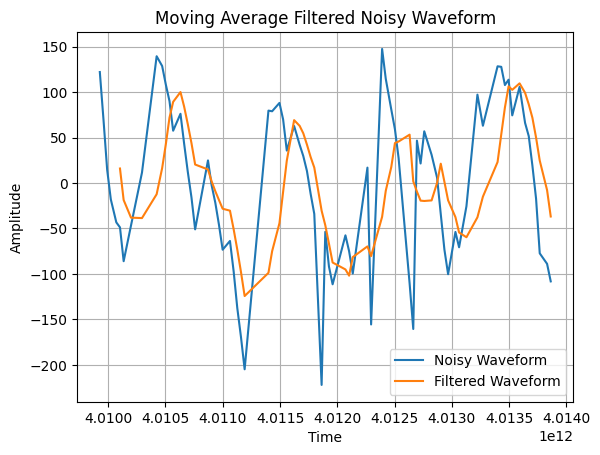

In [126]:
moving_avg_filter_det_z = Moving_Avg_Filter(t,det_z)

# Peak Detection

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def Peak_detect(t,x):
  # Find peaks in the waveform
  peaks, _ = find_peaks(x, distance=50)

  # Plotting the original waveform with detected peaks
  plt.figure()
  plt.plot(t, x, label='Noisy Waveform')
  plt.plot(peaks, x[peaks], 'x', label='Detected Peaks', color='red')
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  plt.title('Peak Detection in Noisy Waveform')
  plt.legend()
  plt.grid(True)
  plt.show()

## Peak Detection For X

### Low Pass Filter with Raw SIgnal

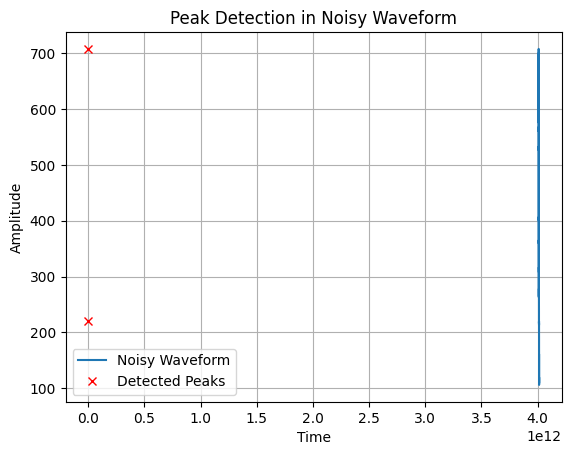

In [128]:
Peak_detect(t,low_pass_filt_raw_x)

### Low Pass Filter with Detrend Signal

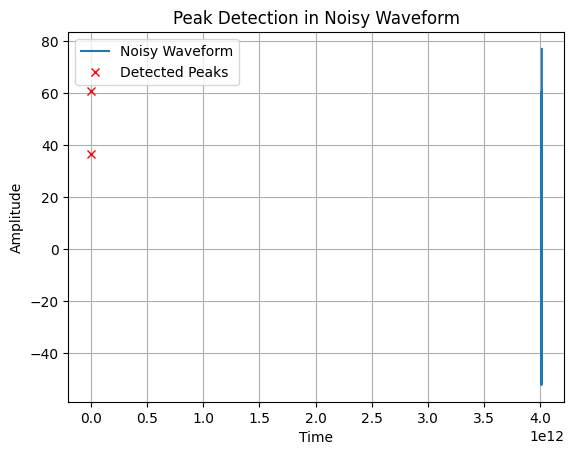

In [129]:
Peak_detect(t,low_pass_filt_det_x)

### Moving AVG Filter for Raw Signal

ValueError: x and y must have same first dimension, but have shapes (82,) and (77,)

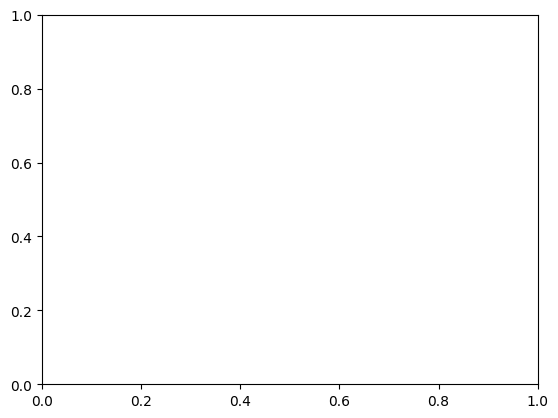

In [130]:
Peak_detect(t,moving_avg_filter_raw_x)

### Moving AVG Filter for Detrend Signal

In [ ]:
Peak_detect(t,moving_avg_filter_det_X)

## Peak Detection For Y




### Low Pass Filter with Raw Signal

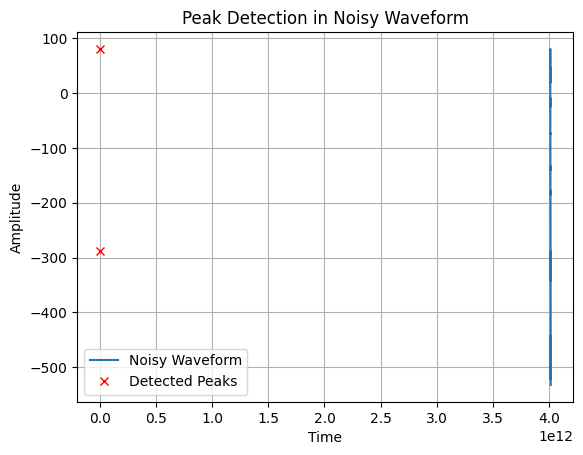

In [132]:
Peak_detect(t,low_pass_filt_raw_y)

### Low Pass Filter with Detrend Signal

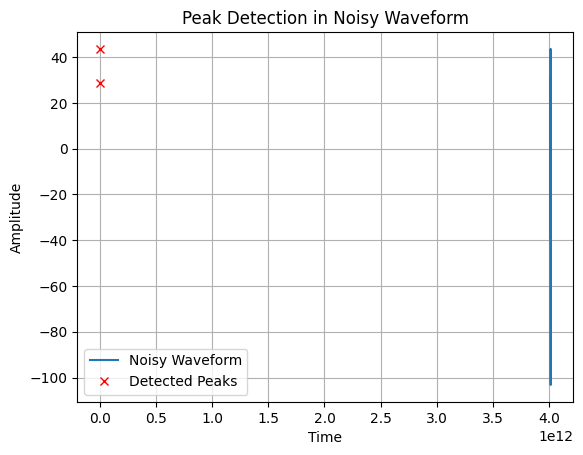

In [133]:
Peak_detect(t,low_pass_filt_det_y)

### Moving AVG Filter for Raw Signal

ValueError: x and y must have same first dimension, but have shapes (82,) and (77,)

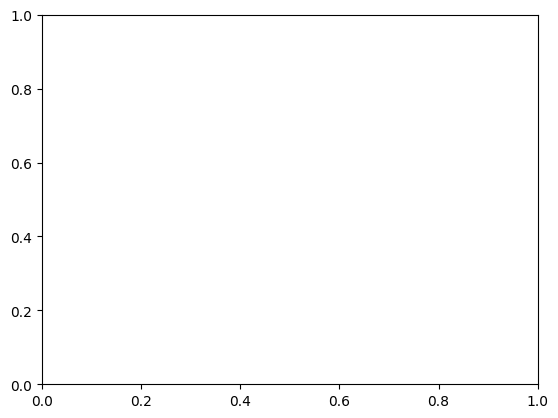

In [134]:
Peak_detect(t,moving_avg_filter_raw_y)

### Moving AVG Filter for Detrend Signal

ValueError: x and y must have same first dimension, but have shapes (82,) and (77,)

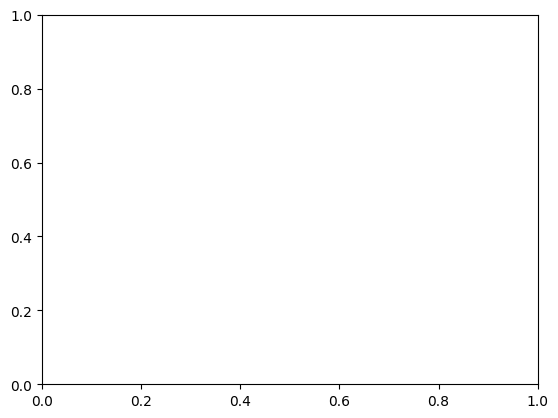

In [135]:
Peak_detect(t,moving_avg_filter_det_y)

## Peak Detection For Z

### Low Pass Filter with Raw Signal

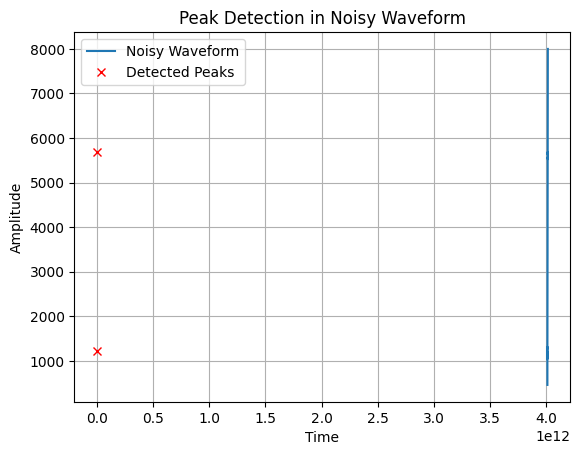

In [136]:
Peak_detect(t,low_pass_filt_raw_z)

### Low Pass Filter with Detrend Signal

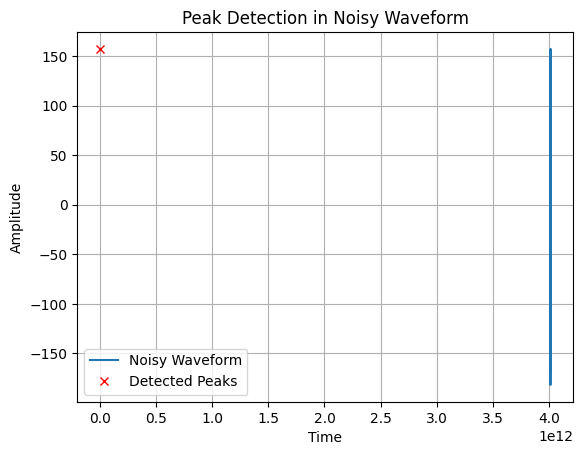

In [138]:
Peak_detect(t,low_pass_filt_det_z)

### Moving AVG Filter for Detrend Signal

In [ ]:
Peak_detect(t,moving_avg_filter_raw_z)

### Moving AVG Filter for Detrend Signal

In [ ]:
Peak_detect(t,moving_avg_filter_det_z)